
Circuit string: R_0-p(R_1,C_1)-p(R_2,CPE_2)-Wo_1
Fit: True

Initial guesses:
    R_0 = 5.00e+01 [Ohm]
    R_1 = 1.00e+01 [Ohm]
    C_1 = 1.00e-01 [F]
    R_2 = 1.00e+01 [Ohm]
  CPE_2_0 = 1.00e-01 [Ohm^-1 sec^a]
  CPE_2_1 = 9.00e-01 []
  Wo_1_0 = 2.00e+00 [Ohm]
  Wo_1_1 = 5.00e+00 [sec]

Fit parameters:
    R_0 = 2.45e-01  (+/- 2.67e-03) [Ohm]
    R_1 = 3.44e+03  (+/- 5.39e+08) [Ohm]
    C_1 = 8.38e+01  (+/- 9.30e+01) [F]
    R_2 = 1.58e-01  (+/- 8.37e-03) [Ohm]
  CPE_2_0 = 7.75e-02  (+/- 2.03e-02) [Ohm^-1 sec^a]
  CPE_2_1 = 7.39e-01  (+/- 4.35e-02) []
  Wo_1_0 = 1.56e+00  (+/- 7.50e+05) [Ohm]
  Wo_1_1 = 1.54e+03  (+/- 1.49e+09) [sec]



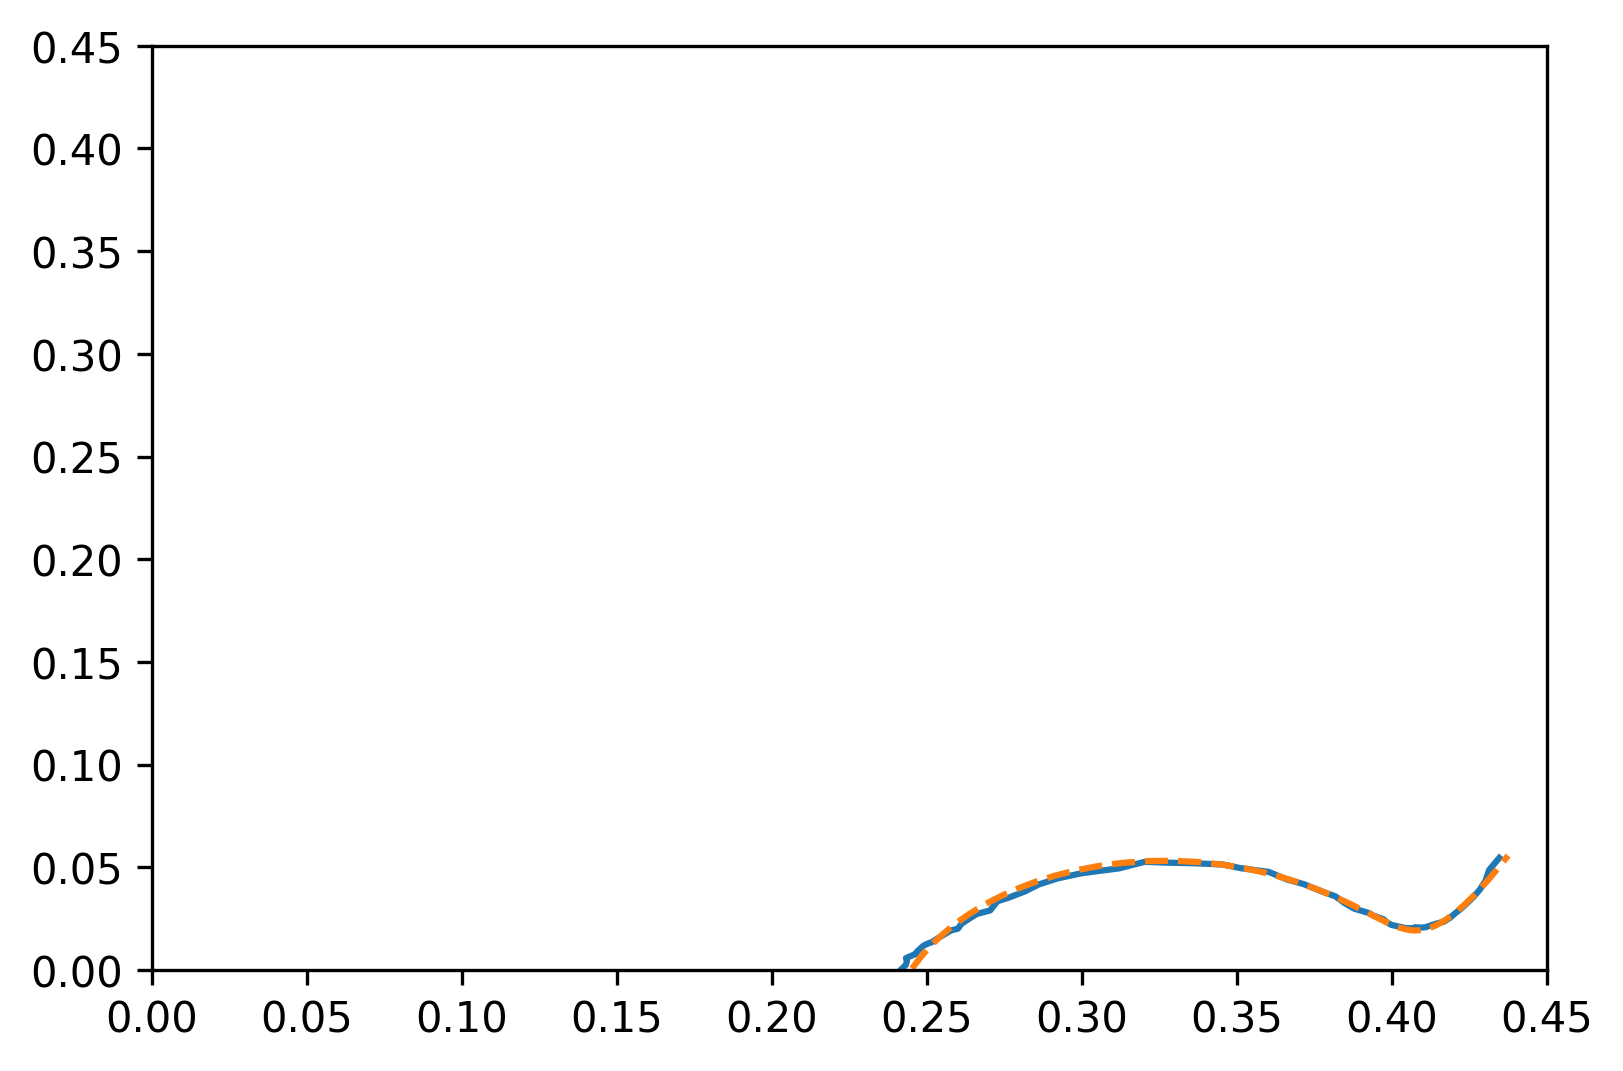

In [6]:
'''The impedance module uses scipy non-linear least squares regression to fit measured data to a circuit model'''

import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
from impedance import preprocessing
from impedance.models.circuits import CustomCircuit, Randles
from impedance.visualization import plot_nyquist

file_dir = "/Users/wesleychang/OneDrive - Drexel University/Chang Lab/General/Group/Data/Biologic/"


filenames = ['08052024_AS_EIS_pouch_cell_test_C04.mpt'] #Biologic EIS file 
fig1 = plt.figure(dpi=300, figsize = (6,4))

ax = fig1.add_subplot(111)

for f in filenames:
    # df = pd.read_csv(file_dir+f, sep='\t')
    # ax1.plot(df['Re(Z)/Ohm'], df['-Im(Z)/Ohm'])
    frequencies, Z = preprocessing.readBioLogic(file_dir+f)
    circuit = 'R_0-p(R_1,C_1)-p(R_2,CPE_2)-Wo_1'
    initial_guess = [50, 10, 0.1, 10, 0.1, 0.9, 2, 5]

    circuit = CustomCircuit(circuit, initial_guess=initial_guess)
    circuit.fit(frequencies, Z)
    print(circuit)
    Z_fit = circuit.predict(frequencies)
    ax.plot(Z.real, -Z.imag)
    ax.plot(Z_fit.real, -Z_fit.imag, ls = 'dashed')
    # plot_nyquist(Z, fmt='o', scale=10, ax=ax)
    # plot_nyquist(Z_fit, fmt='-', scale=10, ax=ax)
    ax.set_xlim(0, 0.45)
    ax.set_ylim(0, 0.45)
plt.show()
    